In [93]:
# Imports
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [94]:
table = "new_db_Feb2023.csv"
opened = open(table,"r")
readed = pd.read_csv(table, sep=",", na_filter=True)
readed = readed.fillna(-3333)
print(readed)

table2 = "4fgl-dr3_LCR.csv"

df_4fgldr3 = pd.read_csv(table2, sep = ',', dtype={'Source_Name': str,
                                                               'Flux1000': float, 
																'Energy_Flux100': float, 
																'PL_Index': float, 
																'Variability_Index': float,
																'Frac_Variability': float,
																'Unc_Frac_variability': float,
																'CLASS1': str, 
																'ASSOC1': str} )

print(df_4fgldr3)

         Unnamed: 0        source_name cadence       tmin       tmax  \
0                 0  4FGL J0001.2-0747   daily  239587201  239846401   
1                 1  4FGL J0001.5+2113   daily  239587201  239846401   
2                 2  4FGL J0003.3-1928   daily  239587201  239846401   
3                 3  4FGL J0004.3+4614   daily  239587201  239846401   
4                 4  4FGL J0004.4-4737   daily  239587201  239846401   
...             ...                ...     ...        ...        ...   
4132745     4132745  4FGL J2358.0-4601  weekly  698630401  699235201   
4132746     4132746  4FGL J2358.3-1021  weekly  698630401  699235201   
4132747     4132747  4FGL J2358.3+3830  weekly  698630401  699235201   
4132748     4132748  4FGL J2359.0+3922  weekly  698630401  699235201   
4132749     4132749  4FGL J2359.2-3134  weekly  698630401  699235201   

         photon_flux2  photon_flux_error2  photon_index2  return_code2  \
0        2.720000e-08        3.300000e-08           2.18     

In [95]:
#cadence = 'weekly'
cadence = 'monthly'

In [96]:
cadence_df = readed.loc[(readed['cadence'] == cadence) #& \
                        # (readed['ts2'] <= 4.) & \
                        # (readed['photon_flux_error2'] <  readed['photon_flux2'])
                        ]

#Set cuts on the TS, set as -3333 all those below the threshold
#cadence_df.loc[cadence_df['ts2'] <= 9., 'photon_flux2'] = -3333
cadence_df.loc[cadence_df['ts2'] <= 4., ['photon_flux2', 'photon_flux_error2']] = -3333
#Set as -3333 all points with an error larger than the flux
cadence_df.loc[cadence_df['photon_flux_error2'] > cadence_df['photon_flux2'], ['photon_flux2', 'photon_flux_error2']] = -3333
#Set cuts to remove possible outliers due to bad convergence of a bin
cadence_df.loc[cadence_df['photon_flux2'] > 1e-4, ['photon_flux2', 'photon_flux_error2']] = -3333
cadence_df.loc[cadence_df['photon_flux2'] < 1e-10, ['photon_flux2', 'photon_flux_error2']] = -3333
print(cadence_df)

TSTART = np.amin(cadence_df['tmin'])
TSTOP = np.amax(cadence_df['tmax'])

         Unnamed: 0        source_name  cadence       tmin       tmax  \
19826         19826  4FGL J0001.2-0747  monthly  239587201  242179201   
19828         19828  4FGL J0001.5+2113  monthly  239587201  242179201   
19830         19830  4FGL J0003.3-1928  monthly  239587201  242179201   
19832         19832  4FGL J0004.3+4614  monthly  239587201  242179201   
19834         19834  4FGL J0004.4-4737  monthly  239587201  242179201   
...             ...                ...      ...        ...        ...   
4125116     4125116  4FGL J2358.0-4601  monthly  695779201  698371201   
4125118     4125118  4FGL J2358.3-1021  monthly  695779201  698371201   
4125120     4125120  4FGL J2358.3+3830  monthly  695779201  698371201   
4125122     4125122  4FGL J2359.0+3922  monthly  695779201  698371201   
4125124     4125124  4FGL J2359.2-3134  monthly  695779201  698371201   

         photon_flux2  photon_flux_error2  photon_index2  return_code2   ts2  
19826         -3333.0             -3333.0   

In [97]:
names = np.unique(readed['source_name']) #.drop_duplicates(subset=['source_name'], inplace=False)#[1]
print(names, len(names))

['4FGL J0001.2-0747' '4FGL J0001.5+2113' '4FGL J0003.3-1928' ...
 '4FGL J2358.3-1021' '4FGL J2359.0+3922' '4FGL J2359.2-3134'] 1525


In [98]:
from fractional_variability import fvar
from fermi_catalog import select_bll, select_fsrq, select_bcu

In [99]:
#Fractional variability calculated in the 4FGL-DR3
fvar_4fgldr3=df_4fgldr3['Frac_Variability']
fvar_err_4fgldr3=df_4fgldr3['Unc_Frac_Variability']

In [100]:
#Redshift and frequency of the synchrotron peak reported in the 4LAC-DR3
df_4lacdr3 = pd.read_csv('4lac_redshifts.csv', delimiter='\t', comment='#')
print(df_4lacdr3)

              4FGL_name     redshift SED type       nu_sync
0     4FGL J0001.2+4741 -3333.000000      ISP  1.000000e+14
1     4FGL J0001.2-0747 -3333.000000      LSP  9.120108e+13
2     4FGL J0001.4-0010     0.461516      LSP  3.609939e+12
3     4FGL J0001.5+2113     1.106000      ISP  1.584893e+14
4     4FGL J0001.6-4156 -3333.000000      HSP  7.328246e+15
...                 ...          ...      ...           ...
3809  4FGL J2329.7+6101 -3333.000000      NaN  0.000000e+00
3810  4FGL J2347.0+5141     0.044000      HSP  1.566751e+16
3811  4FGL J2347.9+5436 -3333.000000      NaN  0.000000e+00
3812  4FGL J2353.5+6646 -3333.000000      NaN  0.000000e+00
3813  4FGL J2358.4+6547 -3333.000000      NaN  0.000000e+00

[3814 rows x 4 columns]


In [101]:
fsrq_df = select_fsrq()
fsrq_names = fsrq_df['Source_Name']

#I added a list to append individually fvar and the error, as well as the average flux
#It is redundant since everything is also stored in fsrq_fractionalflux, but it does not 
#consume a lot of time and for fast checks it might be accessed more easily 
fsrq_avflux = []
fsrq_fvar = []
fsrq_fvar_err = []
fsrq_fmatrix = []
fsrq_fractionalflux = []
fsrq_nanbins = []
fsrq_nanbinsmatrix = []
fsrq_minflux=[]
fsrq_maxflux=[]
fsrq_fvar_4fgldr3=[]
fsrq_fvar_err_4fgldr3=[]
fsrq_z_4lac_dr3=[]
fsrq_nu_sync_4lac_dr3=[]
fsrq_fvar_4lac_dr3 = []
fsrq_fvar_err_4lac_dr3 = []
fsrq_avflux_4lac_dr3 = []
for i, fsrq in enumerate(fsrq_names):
    #This is just to delete variables to avoid problems due to overwriting
    delete_variables=['averageflux','source_array','flux','flux_err','var','var_err','factors','count']
    for j,variable in enumerate(delete_variables):
        if variable in globals():
            del variable
    delete_variables=['averageflux','source_array','flux','flux_err','var','var_err','factors','count']
    for j,variable in enumerate(delete_variables):
        if variable in locals():
            del variable
    # print(i, bcu)
    source_array = cadence_df.loc[cadence_df['source_name'] == fsrq]
    count = np.count_nonzero(source_array['photon_flux2'] != -3333)
    total_points=len(source_array['photon_flux2'])
    #if count>1: #Since we are interested in variability, we exclude sources with just 1 no-nan value
    if count>0.3*total_points: #Since we are interested in variability, we exclude sources with less than 30% of the points
        averageflux = np.mean(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
        
        flux = np.array(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
        flux_err = np.array(source_array[source_array['photon_flux_error2']!=-3333]['photon_flux_error2'])
        var, var_err = fvar(flux, flux_err)
    
        factors = source_array['photon_flux2']/averageflux
        #factors = source_array['photon_flux2']/np.min(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
        fsrq_nanbins.append(len(source_array[source_array['photon_flux2']== -3333]['photon_flux2']))
        fsrq_nanbinsmatrix.append(np.array(source_array['photon_flux2'] == -3333))
        fsrq_fmatrix.append(factors.tolist())
        fsrq_fractionalflux.append([fsrq, averageflux, var, var_err])
        fsrq_avflux.append(averageflux)
        fsrq_fvar.append(var)
        fsrq_fvar_err.append(var_err)
        fsrq_minflux.append(np.min(source_array[source_array['photon_flux2']!=-3333]['photon_flux2']))
        fsrq_maxflux.append(np.max(source_array[source_array['photon_flux2']!=-3333]['photon_flux2']))

        fsrq_fvar_4fgldr3.append(df_4fgldr3[df_4fgldr3['Source_Name'] == fsrq]['Frac_Variability'])
        fsrq_fvar_err_4fgldr3.append(df_4fgldr3[df_4fgldr3['Source_Name'] == fsrq]['Unc_Frac_Variability'])

        if fsrq in df_4lacdr3['4FGL_name'].values:
            fsrq_fvar_4lac_dr3.append(var)
            fsrq_fvar_err_4lac_dr3.append(var_err)
            fsrq_avflux_4lac_dr3.append(averageflux)
            fsrq_z_4lac_dr3.append(df_4lacdr3[df_4lacdr3['4FGL_name'] == fsrq]['redshift'].values[0])
            fsrq_nu_sync_4lac_dr3.append(df_4lacdr3[df_4lacdr3['4FGL_name'] == fsrq]['nu_sync'].values[0])

fsrq_fmatrix = np.array(fsrq_fmatrix)
fsrq_nanbinsmatrix = np.array(fsrq_nanbinsmatrix)

fsrq_fvar_4fgldr3=np.array(fsrq_fvar_4fgldr3)[:,0]
fsrq_fvar_err_4fgldr3=np.array(fsrq_fvar_err_4fgldr3)[:,0]

fsrq_z_4lac_dr3=np.array(fsrq_z_4lac_dr3)
fsrq_nu_sync_4lac_dr3=np.array(fsrq_nu_sync_4lac_dr3)



-----------------------------
Selecting FSRQ type blazars
Total number of variable objects: 572


In [102]:
bll_df = select_bll()
bll_names = bll_df['Source_Name']

#I added a list to append individually fvar and the error, as well as the average flux
#It is redundant since everything is also stored in bll_fractionalflux, but it does not 
#consume a lot of time and for fast checks it might be accessed more easily 
bll_avflux = []
bll_fvar = []
bll_fvar_err = []
bll_fmatrix = []
bll_fractionalflux = []
bll_nanbins = []
bll_nanbinsmatrix = []
bll_minflux=[]
bll_maxflux=[]
bll_fvar_4fgldr3=[]
bll_fvar_err_4fgldr3=[]
bll_z_4lac_dr3=[]
bll_nu_sync_4lac_dr3=[]
bll_fvar_4lac_dr3 = []
bll_fvar_err_4lac_dr3 = []
bll_avflux_4lac_dr3 = []
for i, bll in enumerate(bll_names):
    #This is just to delete variables to avoid problems due to overwriting
    delete_variables=['averageflux','source_array','flux','flux_err','var','var_err','factors','count']
    for j,variable in enumerate(delete_variables):
        if variable in globals():
            del variable
    delete_variables=['averageflux','source_array','flux','flux_err','var','var_err','factors','count']
    for j,variable in enumerate(delete_variables):
        if variable in locals():
            del variable
    # print(i, bcu)
    source_array = cadence_df.loc[cadence_df['source_name'] == bll]
    count = np.count_nonzero(source_array['photon_flux2'] != -3333)
    total_points=len(source_array['photon_flux2'])
    #if count>1: #Since we are interested in variability, we exclude sources with just 1 no-nan value
    if count>0.3*total_points: #Since we are interested in variability, we exclude sources with less than 30% of the points
        averageflux = np.mean(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
        
        flux = np.array(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
        flux_err = np.array(source_array[source_array['photon_flux_error2']!=-3333]['photon_flux_error2'])
        var, var_err = fvar(flux, flux_err)
        
        factors = source_array['photon_flux2']/averageflux
        #factors = source_array['photon_flux2']/np.min(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
        bll_nanbins.append(len(source_array[source_array['photon_flux2']==-3333]['photon_flux2']))
        bll_nanbinsmatrix.append(np.array(source_array['photon_flux2'] == -3333))
        bll_fmatrix.append(factors.tolist())
        bll_fractionalflux.append([bll, averageflux, var, var_err])
        bll_avflux.append(averageflux)
        bll_fvar.append(var)
        bll_fvar_err.append(var_err)
        bll_minflux.append(np.min(source_array[source_array['photon_flux2']!=-3333]['photon_flux2']))
        bll_maxflux.append(np.max(source_array[source_array['photon_flux2']!=-3333]['photon_flux2']))

        bll_fvar_4fgldr3.append(df_4fgldr3[df_4fgldr3['Source_Name'] == bll]['Frac_Variability'])
        bll_fvar_err_4fgldr3.append(df_4fgldr3[df_4fgldr3['Source_Name'] == bll]['Unc_Frac_Variability'])

        if bll in df_4lacdr3['4FGL_name'].values:
            bll_fvar_4lac_dr3.append(var)
            bll_fvar_err_4lac_dr3.append(var_err)
            bll_avflux_4lac_dr3.append(averageflux)
            bll_z_4lac_dr3.append(df_4lacdr3[df_4lacdr3['4FGL_name'] == bll]['redshift'].values[0])
            bll_nu_sync_4lac_dr3.append(df_4lacdr3[df_4lacdr3['4FGL_name'] == bll]['nu_sync'].values[0])

bll_fmatrix = np.array(bll_fmatrix)
bll_nanbinsmatrix = np.array(bll_nanbinsmatrix)

bll_fvar_4fgldr3=np.array(bll_fvar_4fgldr3)[:,0]
bll_fvar_err_4fgldr3=np.array(bll_fvar_err_4fgldr3)[:,0]

bll_z_4lac_dr3=np.array(bll_z_4lac_dr3)
bll_nu_sync_4lac_dr3=np.array(bll_nu_sync_4lac_dr3)



-----------------------------
Selecting BL Lac type blazars
Total number of variable objects: 477


In [103]:
bcu_df = select_bcu()
bcu_names = bcu_df['Source_Name']

#I added a list to append individually fvar and the error, as well as the average flux
#It is redundant since everything is also stored in bcu_fractionalflux, but it does not 
#consume a lot of time and for fast checks it might be accessed more easily 
bcu_avflux = []
bcu_fvar = []
bcu_fvar_err = []
bcu_fmatrix = []
bcu_fractionalflux = []
bcu_nanbins = []
bcu_nanbinsmatrix = []
bcu_minflux=[]
bcu_maxflux=[]
bcu_fvar_4fgldr3=[]
bcu_fvar_err_4fgldr3=[]
bcu_z_4lac_dr3=[]
bcu_nu_sync_4lac_dr3=[]
bcu_fvar_4lac_dr3 = []
bcu_fvar_err_4lac_dr3 = []
bcu_avflux_4lac_dr3 = []
for i, bcu in enumerate(bcu_names):
    #This is just to delete variables to avoid problems due to overwriting
    delete_variables=['averageflux','source_array','flux','flux_err','var','var_err','factors','count','total_points','count']
    for j,variable in enumerate(delete_variables):
        if variable in globals():
            del variable
    delete_variables=['averageflux','source_array','flux','flux_err','var','var_err','factors','count','total_points','count']
    for j,variable in enumerate(delete_variables):
        if variable in locals():
            del variable
    # print(i, bcu)
    source_array = cadence_df.loc[cadence_df['source_name'] == bcu]
    count = np.count_nonzero(source_array['photon_flux2'] != -3333)
    total_points=len(source_array['photon_flux2'])
    #if count>1: #Since we are interested in variability, we exclude sources with just 1 no-nan value
    if count>0.3*total_points: #Since we are interested in variability, we exclude sources with less than 30% of the points
        averageflux = np.mean(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
        flux = np.array(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
        flux_err = np.array(source_array[source_array['photon_flux_error2']!=-3333]['photon_flux_error2'])
        var, var_err = fvar(flux, flux_err)
    
        factors = source_array['photon_flux2']/averageflux
        #factors = source_array['photon_flux2']/np.min(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
        bcu_nanbins.append(len(source_array[source_array['photon_flux2']==-3333]['photon_flux2']))
        bcu_nanbinsmatrix.append(np.array(source_array['photon_flux2'] == -3333))
        bcu_fmatrix.append(factors.tolist())
        bcu_fractionalflux.append([bcu, averageflux, var, var_err])
        bcu_avflux.append(averageflux)
        bcu_fvar.append(var)
        bcu_fvar_err.append(var_err)
        bcu_minflux.append(np.min(source_array[source_array['photon_flux2']!=-3333]['photon_flux2']))
        bcu_maxflux.append(np.max(source_array[source_array['photon_flux2']!=-3333]['photon_flux2']))

        bcu_fvar_4fgldr3.append(df_4fgldr3[df_4fgldr3['Source_Name'] == bcu]['Frac_Variability'])
        bcu_fvar_err_4fgldr3.append(df_4fgldr3[df_4fgldr3['Source_Name'] == bcu]['Unc_Frac_Variability'])

        if bcu in df_4lacdr3['4FGL_name'].values:
            bcu_fvar_4lac_dr3.append(var)
            bcu_fvar_err_4lac_dr3.append(var_err)
            bcu_avflux_4lac_dr3.append(averageflux)
            bcu_z_4lac_dr3.append(df_4lacdr3[df_4lacdr3['4FGL_name'] == bcu]['redshift'].values[0])
            bcu_nu_sync_4lac_dr3.append(df_4lacdr3[df_4lacdr3['4FGL_name'] == bcu]['nu_sync'].values[0])

bcu_fmatrix = np.array(bcu_fmatrix)
bcu_nanbinsmatrix = np.array(bcu_nanbinsmatrix)

bcu_fvar_4fgldr3=np.array(bcu_fvar_4fgldr3)[:,0]
bcu_fvar_err_4fgldr3=np.array(bcu_fvar_err_4fgldr3)[:,0]

bcu_z_4lac_dr3=np.array(bcu_z_4lac_dr3)
bcu_nu_sync_4lac_dr3=np.array(bcu_nu_sync_4lac_dr3)

print(len(bcu_names))
print(len(bcu_avflux_4lac_dr3))
print(len(bcu_z_4lac_dr3))


-----------------------------
Selecting unknown type blazars
Total number of variable objects: 364
364
93
93


In [104]:
print(df_4lacdr3['redshift'])
print(df_4lacdr3['4FGL_name'])

0      -3333.000000
1      -3333.000000
2          0.461516
3          1.106000
4      -3333.000000
           ...     
3809   -3333.000000
3810       0.044000
3811   -3333.000000
3812   -3333.000000
3813   -3333.000000
Name: redshift, Length: 3814, dtype: float64
0       4FGL J0001.2+4741
1       4FGL J0001.2-0747
2       4FGL J0001.4-0010
3       4FGL J0001.5+2113
4       4FGL J0001.6-4156
              ...        
3809    4FGL J2329.7+6101
3810    4FGL J2347.0+5141
3811    4FGL J2347.9+5436
3812    4FGL J2353.5+6646
3813    4FGL J2358.4+6547
Name: 4FGL_name, Length: 3814, dtype: object


18.679114500247156
18.46331934597019
12.443970138409632


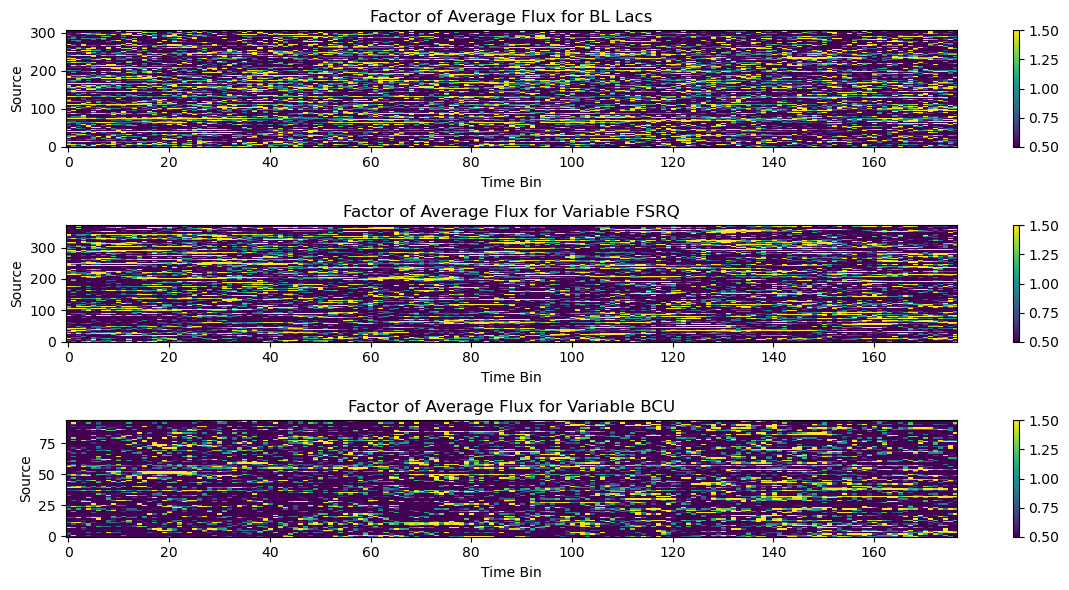

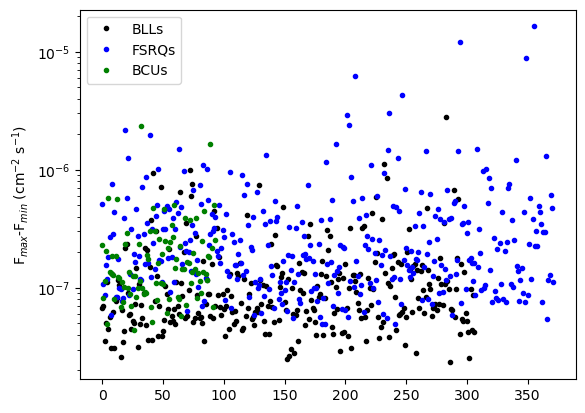

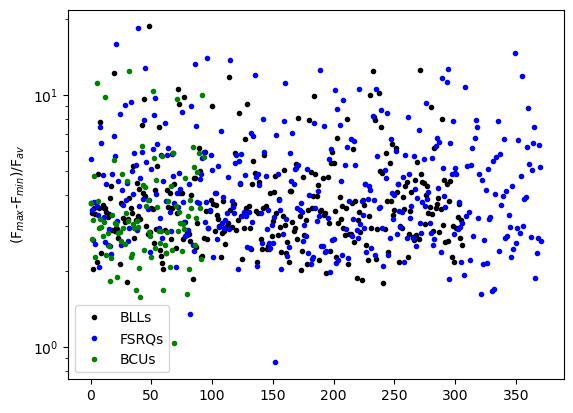

In [105]:
import matplotlib
cmap = matplotlib.cm.bone
import matplotlib.colors as colors

cmap.set_bad('Red',1.)

fig, ax = plt.subplots(3, 1, figsize=(12,6), sharex=True, )
bll_fmatrix_masked =  np.ma.masked_where(bll_nanbinsmatrix <0, bll_fmatrix)
fsrq_fmatrix_masked =  np.ma.masked_where(fsrq_nanbinsmatrix <0, fsrq_fmatrix)
bcu_fmatrix_masked =  np.ma.masked_where(bcu_nanbinsmatrix <0, bcu_fmatrix)
cax1 = ax[0].imshow(bll_fmatrix_masked, aspect='auto', interpolation='nearest', origin='lower', cmap='viridis')#, extent=[TSTART/1e8, TSTOP/1e8, 0, len(bll_fmatrix)])
cax2 = ax[1].imshow(fsrq_fmatrix_masked, aspect='auto', interpolation='nearest', origin='lower', cmap='viridis')#, extent=[TSTART/1e8, TSTOP/1e8, 0, len(bll_fmatrix)])
cax3 = ax[2].imshow(bcu_fmatrix_masked, aspect='auto', interpolation='nearest', origin='lower', cmap='viridis')#, extent=[TSTART/1e8, TSTOP/1e8, 0, len(bll_fmatrix)])

print(np.max(bll_fmatrix_masked))
print(np.max(fsrq_fmatrix_masked))
print(np.max(bcu_fmatrix_masked))

cax1.set_clim(0.5,1.5)
cax2.set_clim(0.5,1.5)
cax3.set_clim(0.5,1.5)

plt.colorbar(cax1, ax=ax[0])
plt.colorbar(cax2, ax=ax[1])
plt.colorbar(cax3, ax=ax[2])

ax[0].set_title("Factor of Average Flux for BL Lacs")
ax[0].set_xlabel("Time Bin")
ax[0].set_ylabel("Source")
ax[1].set_title("Factor of Average Flux for Variable FSRQ")
ax[1].set_xlabel("Time Bin")
ax[1].set_ylabel("Source")
ax[2].set_title("Factor of Average Flux for Variable BCU")
ax[2].set_xlabel("Time Bin")
ax[2].set_ylabel("Source")

ax[0].xaxis.set_ticks_position('bottom')
ax[1].xaxis.set_ticks_position('bottom')
ax[2].xaxis.set_ticks_position('bottom')

fig.tight_layout()

plt.figure()
plt.plot(np.array(bll_maxflux)-np.array(bll_minflux),'.k',label='BLLs')
plt.plot(np.array(fsrq_maxflux)-np.array(fsrq_minflux),'.b',label='FSRQs')
plt.plot(np.array(bcu_maxflux)-np.array(bcu_minflux),'.g',label='BCUs')
plt.ylabel(r'F$_{max}$-F$_{min}$ (cm$^{-2}$ s$^{-1}$)')
plt.yscale('log')
plt.legend(loc='best')

plt.figure()
plt.plot((np.array(bll_maxflux)-np.array(bll_minflux))/bll_avflux,'.k',label='BLLs')
plt.plot((np.array(fsrq_maxflux)-np.array(fsrq_minflux))/fsrq_avflux,'.b',label='FSRQs')
plt.plot((np.array(bcu_maxflux)-np.array(bcu_minflux))/bcu_avflux,'.g',label='BCUs')
plt.ylabel(r'(F$_{max}$-F$_{min}$)/F$_{av}$')
plt.yscale('log')
plt.legend(loc='best')


Median flux values for the different types of blazars
BLLs
2.3342710843373493e-08
FSRQs
5.030281540120303e-08
BCUs
4.464248075998077e-08


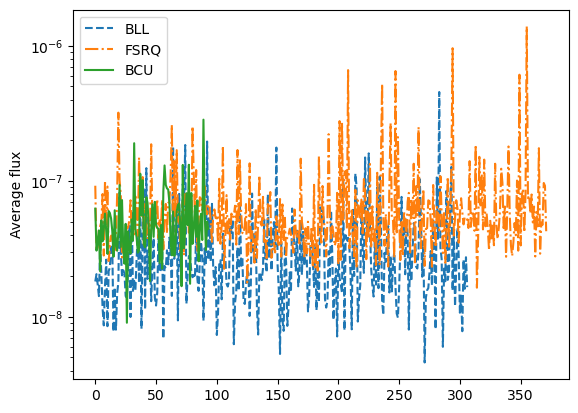

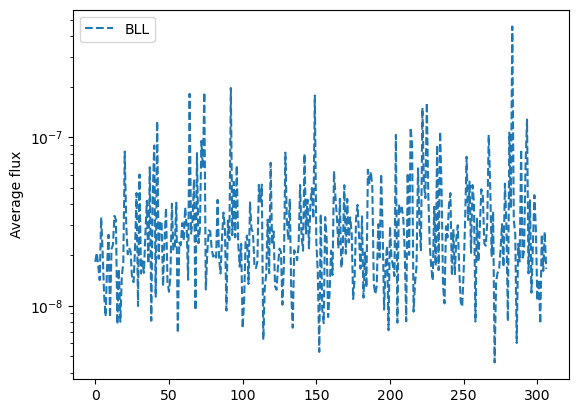

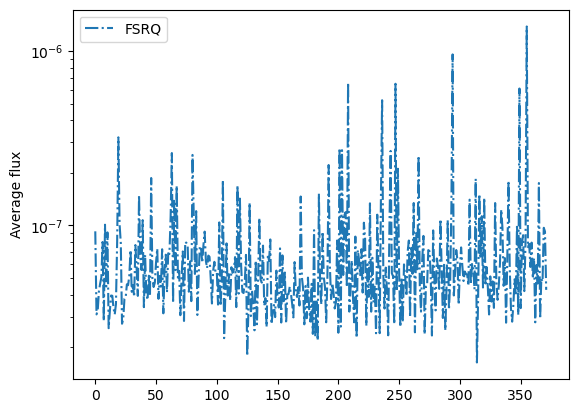

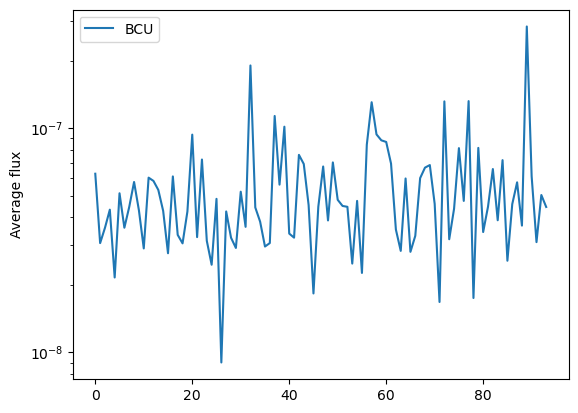

In [106]:
#Mean flux
plt.figure()
plt.plot(bll_avflux,linestyle='--',label='BLL')
plt.plot(fsrq_avflux,linestyle='-.',label='FSRQ')
plt.plot(bcu_avflux,linestyle='-',label='BCU')
plt.yscale('log')
plt.ylabel('Average flux')
plt.legend(loc='best')

plt.figure()
plt.plot(bll_avflux,linestyle='--',label='BLL')
plt.yscale('log')
plt.ylabel('Average flux')
plt.legend(loc='best')

plt.figure()
plt.plot(fsrq_avflux,linestyle='-.',label='FSRQ')
plt.yscale('log')
plt.ylabel('Average flux')
plt.legend(loc='best')

plt.figure()
plt.plot(bcu_avflux,linestyle='-',label='BCU')
plt.yscale('log')
plt.ylabel('Average flux')
plt.legend(loc='best')

import math

filtered_bll_avflux = [x for x in bll_avflux if not math.isnan(x)]
filtered_fsrq_avflux = [x for x in fsrq_avflux if not math.isnan(x)]
filtered_bcu_avflux = [x for x in bcu_avflux if not math.isnan(x)]

#Mean Fvar values
print('Median flux values for the different types of blazars')
print('BLLs')
print(np.median(filtered_bll_avflux))
print('FSRQs')
print(np.median(filtered_fsrq_avflux))
print('BCUs')
print(np.median(filtered_bcu_avflux))

Median Fvar values for the different types of blazars
BLLs
0.42230668188579995
FSRQs
0.6274983404598642
BCUs
0.4660862663042664


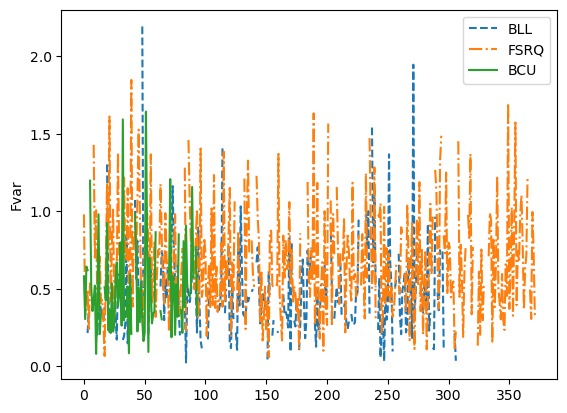

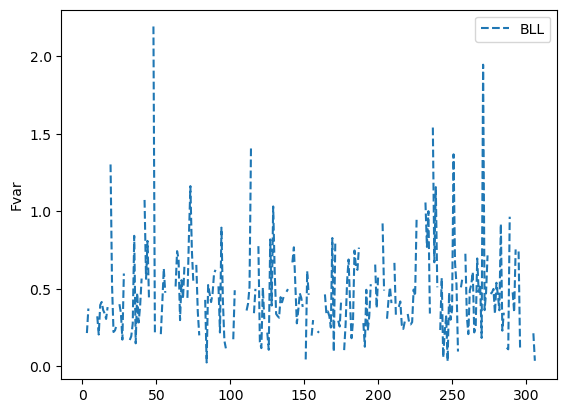

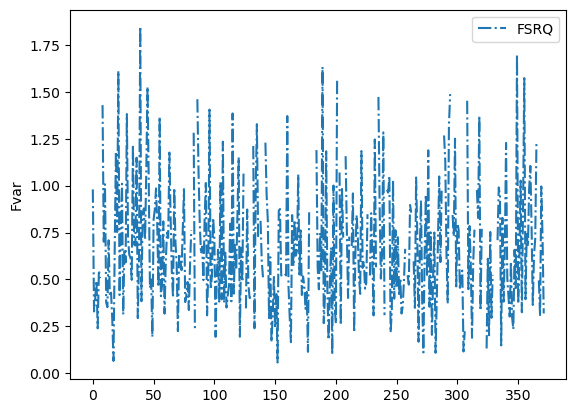

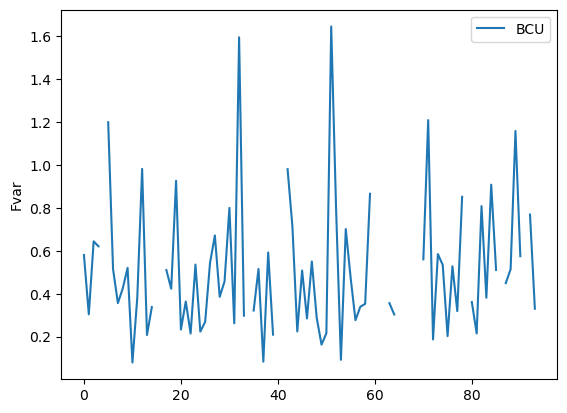

In [107]:
#Mean Fvar
plt.figure()
plt.plot(bll_fvar,linestyle='--',label='BLL')
plt.plot(fsrq_fvar,linestyle='-.',label='FSRQ')
plt.plot(bcu_fvar,linestyle='-',label='BCU')
plt.ylabel('Fvar')
plt.legend(loc='best')

plt.figure()
plt.plot(bll_fvar,linestyle='--',label='BLL')
plt.ylabel('Fvar')
plt.legend(loc='best')

plt.figure()
plt.plot(fsrq_fvar,linestyle='-.',label='FSRQ')
plt.ylabel('Fvar')
plt.legend(loc='best')

plt.figure()
plt.plot(bcu_fvar,linestyle='-',label='BCU')
plt.ylabel('Fvar')
plt.legend(loc='best')

import math

filtered_bll_fvar = [x for x in bll_fvar if not math.isnan(x)]
filtered_fsrq_fvar = [x for x in fsrq_fvar if not math.isnan(x)]
filtered_bcu_fvar = [x for x in bcu_fvar if not math.isnan(x)]

#Mean Fvar values
print('Median Fvar values for the different types of blazars')
print('BLLs')
print(np.median(filtered_bll_fvar))
print('FSRQs')
print(np.median(filtered_fsrq_fvar))
print('BCUs')
print(np.median(filtered_bcu_fvar))

Median number of NaN bins for the different types of blazars
BLLs
64.89902280130293
FSRQs
73.59677419354838
BCUs
97.94680851063829


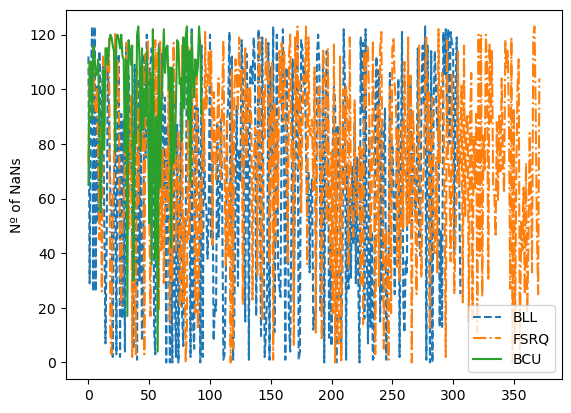

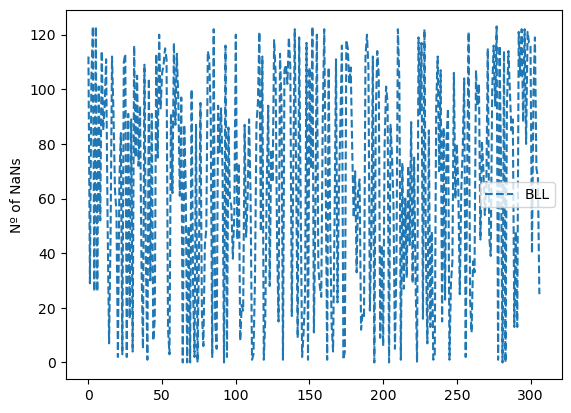

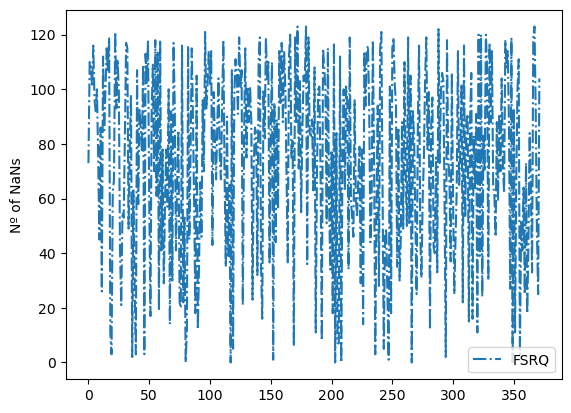

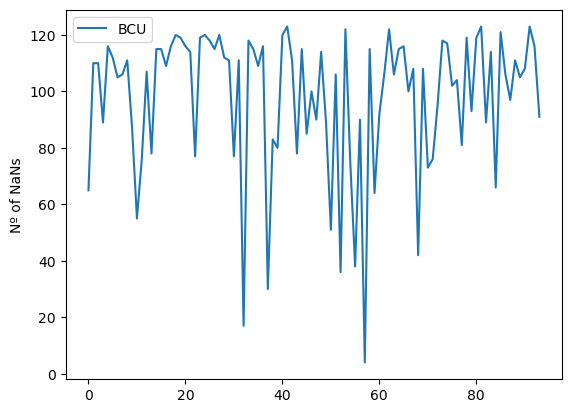

In [108]:
#NaN counting
plt.figure()
plt.plot(bll_nanbins,linestyle='--',label='BLL')
plt.plot(fsrq_nanbins,linestyle='-.',label='FSRQ')
plt.plot(bcu_nanbins,linestyle='-',label='BCU')
plt.ylabel('Nº of NaNs')
plt.legend(loc='best')

plt.figure()
plt.plot(bll_nanbins,linestyle='--',label='BLL')
plt.ylabel('Nº of NaNs')
plt.legend(loc='best')

plt.figure()
plt.plot(fsrq_nanbins,linestyle='-.',label='FSRQ')
plt.ylabel('Nº of NaNs')
plt.legend(loc='best')

plt.figure()
plt.plot(bcu_nanbins,linestyle='-',label='BCU')
plt.ylabel('Nº of NaNs')
plt.legend(loc='best')

#Mean Fvar values
print('Median number of NaN bins for the different types of blazars')
print('BLLs')
print(np.mean(bll_nanbins))
print('FSRQs')
print(np.mean(fsrq_nanbins))
print('BCUs')
print(np.mean(bcu_nanbins))

In [109]:
bll_fmatrix_plus = np.copy(bll_fmatrix)
bll_fmatrix_plus[bll_fmatrix_plus<0] = 0
#If we want this score to be representative, we need to account for the fact that not all sources
#have the same nº of non-NaN bins, so we divide by the number of points
Nbll=[]
for i in range(len(bll_fmatrix)):
    Nbll.append(np.count_nonzero(bll_fmatrix_plus[i]))
Tot_score_bll = np.nansum(bll_fmatrix_plus, axis=1)/(np.array(Nbll)-1)

fsrq_fmatrix_plus = np.copy(fsrq_fmatrix)
fsrq_fmatrix_plus[fsrq_fmatrix_plus<0] = 0
Nfsrq=[]
for i in range(len(fsrq_fmatrix)):
    Nfsrq.append(np.count_nonzero(fsrq_fmatrix_plus[i]))
Tot_score_fsrq = np.nansum(fsrq_fmatrix_plus, axis=1)/(np.array(Nfsrq)-1)

bcu_fmatrix_plus = np.copy(bcu_fmatrix)
bcu_fmatrix_plus[bcu_fmatrix_plus<0] = 0
Nbcu=[]
for i in range(len(bcu_fmatrix)):
    Nbcu.append(np.count_nonzero(bcu_fmatrix_plus[i]))
Tot_score_bcu = np.nansum(bcu_fmatrix_plus, axis=1)/(np.array(Nbcu)-1)

print(np.mean(Tot_score_bll), np.mean(Tot_score_fsrq), np.mean(Tot_score_bcu))

#Still I am not sure if this score will be representative, since it only sums factors of the ratio of individual
#fluxes over the mean flux, it depends on the average level and the amount of variability above and below the 
#average

1.010441822151346 1.0109960459280078 1.0138531095073686


3.9976791928547835 4.62210226141276 3.732538619162882


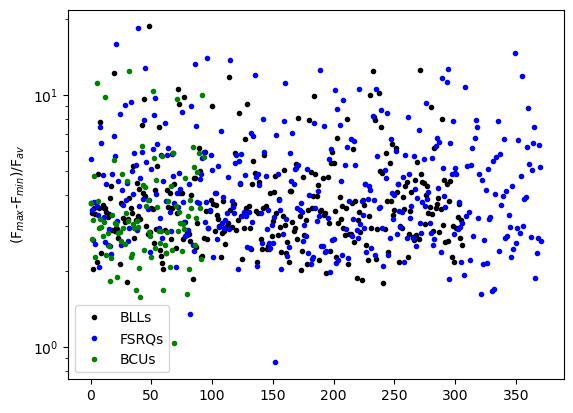

In [110]:
#I am doing tests with other metrics, for now I am measuring as a variability score the difference between maximum
#and minimum flux, divided by the average flux
bll_maxflux=np.array(bll_maxflux)
bll_minflux=np.array(bll_minflux)
fsrq_maxflux=np.array(fsrq_maxflux)
fsrq_minflux=np.array(fsrq_minflux)
bcu_maxflux=np.array(bcu_maxflux)
bcu_minflux=np.array(bcu_minflux)

Tot_score_bll2=(bll_maxflux-bll_minflux)/bll_avflux
Tot_score_fsrq2=(fsrq_maxflux-fsrq_minflux)/fsrq_avflux
Tot_score_bcu2=(bcu_maxflux-bcu_minflux)/bcu_avflux

print(np.mean(Tot_score_bll2), np.mean(Tot_score_fsrq2), np.mean(Tot_score_bcu2))

plt.figure()
plt.plot(Tot_score_bll2,'.k',label='BLLs')
plt.plot(Tot_score_fsrq2,'.b',label='FSRQs')
plt.plot(Tot_score_bcu2,'.g',label='BCUs')
plt.ylabel(r'(F$_{max}$-F$_{min}$)/F$_{av}$')
plt.yscale('log')
plt.legend(loc='best')

In [111]:
bll_fractionalfluxT = np.array(bll_fractionalflux).T
bll_var = np.sort(bll_fractionalfluxT[-2].astype(float))
bll_varerr = bll_fractionalfluxT[-1].astype(float)

fsrq_fractionalfluxT = np.array(fsrq_fractionalflux).T
fsrq_var = np.sort(fsrq_fractionalfluxT[-2].astype(float))
fsrq_varerr = fsrq_fractionalfluxT[-1].astype(float)

bcu_fractionalfluxT = np.array(bcu_fractionalflux).T
bcu_var = np.sort(bcu_fractionalfluxT[-2].astype(float))
bcu_varerr = bcu_fractionalfluxT[-1].astype(float)

[1.00970874 1.01515152 1.01492537 1.01333333 1.01666667 1.0125
 1.01190476 1.01315789 1.00990099 1.00763359 1.01111111 1.00666667
 1.015625   1.01098901 1.01315789 1.01639344 1.01449275 1.01754386
 1.00606061 1.00578035 1.00877193 1.00917431 1.01818182 1.01204819
 1.01538462 1.01298701 1.00735294 1.00645161 1.00826446 1.00813008
 1.01075269 1.01694915 1.01639344 1.00787402 1.01030928 1.01282051
 1.00574713 1.00884956 1.00675676 1.00578035 1.01449275 1.00847458
 1.01204819 1.01111111 1.01010101 1.01492537 1.00578035 1.01587302
 1.01351351 1.01724138 1.00854701 1.00628931 1.01190476 1.01492537
 1.00943396 1.01724138 1.00869565 1.01612903 1.00636943 1.01724138
 1.00740741 1.01020408 1.00680272 1.00854701 1.01020408 1.00840336
 1.01315789 1.00617284 1.01190476 1.00684932 1.01694915 1.01219512
 1.00740741 1.00917431 1.01098901 1.00649351 1.00641026 1.01666667
 1.00649351 1.00813008 1.00568182 1.00609756 1.01666667 1.00763359
 1.01       1.01639344 1.01149425 1.00840336 1.00632911 1.01408451

Text(0.5, 0, 'Source')

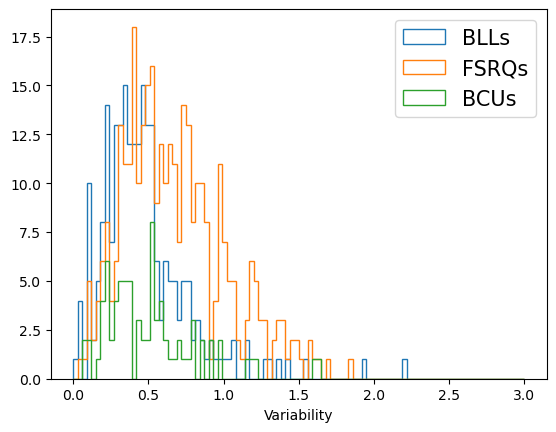

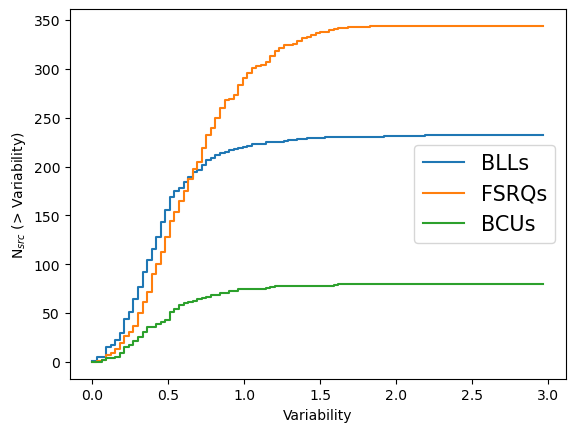

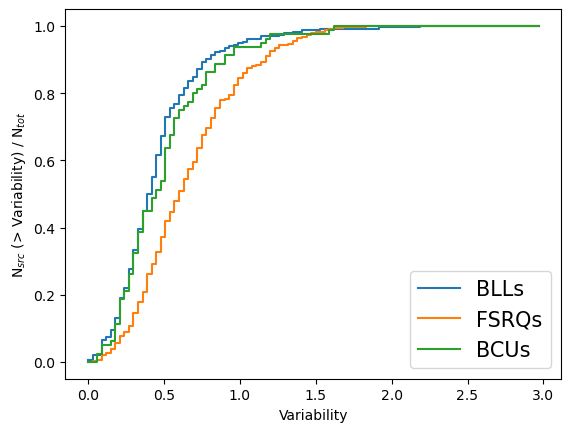

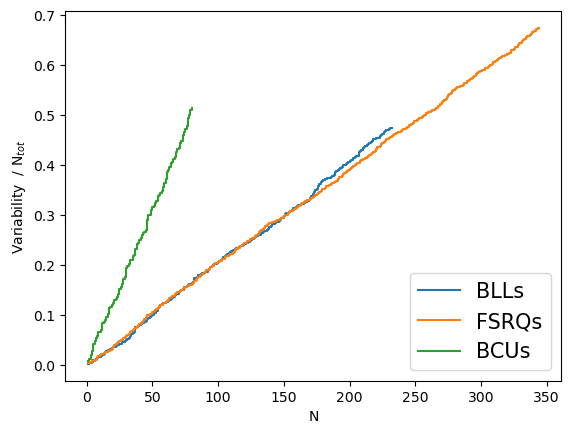

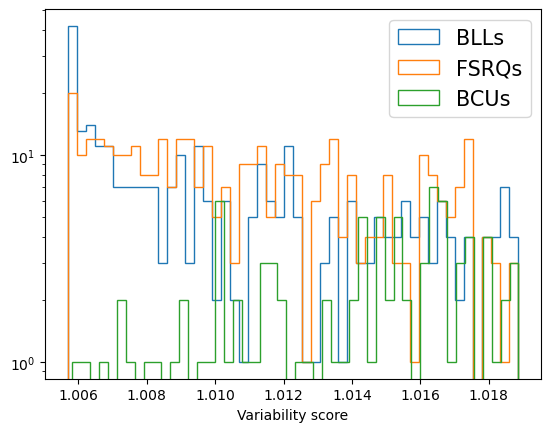

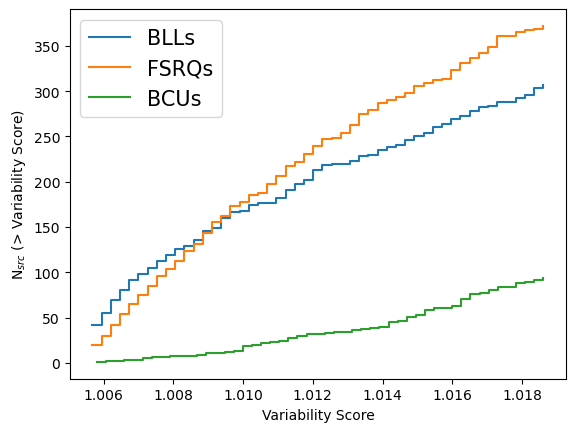

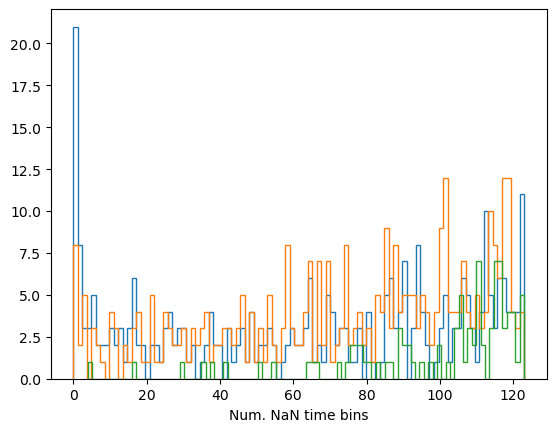

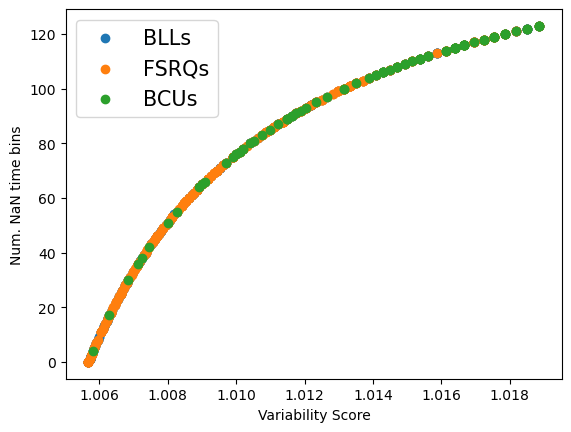

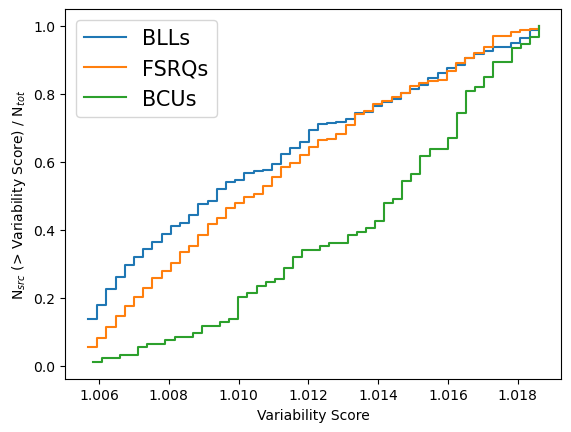

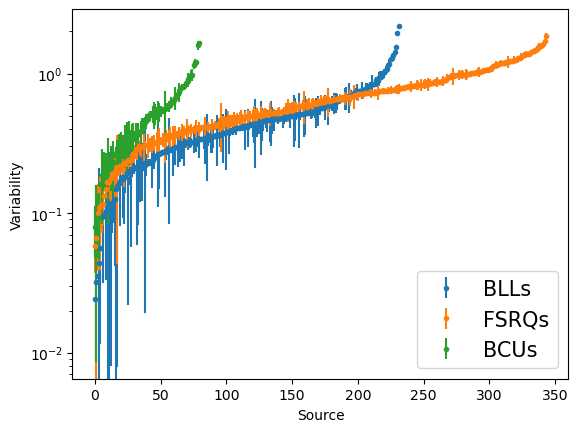

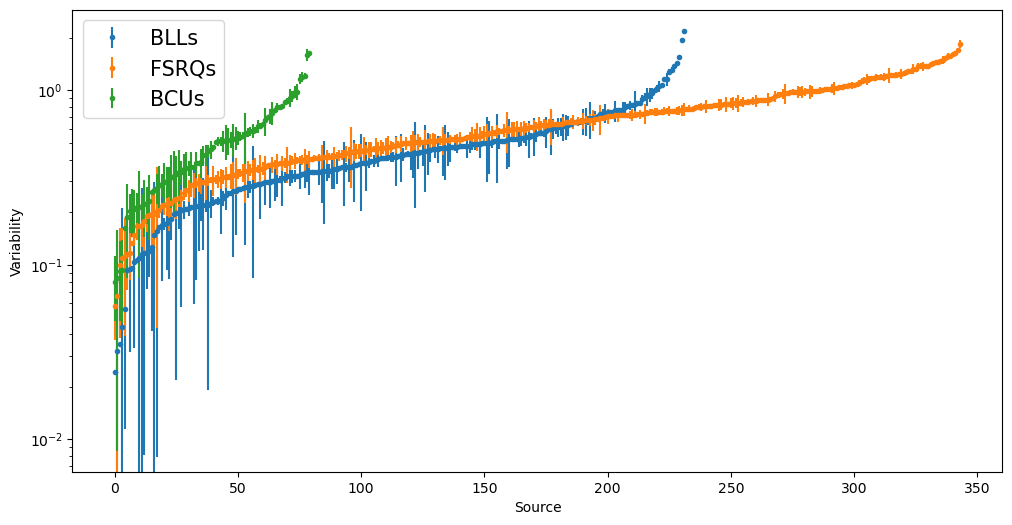

In [112]:
plt.figure()
bllh, bllhx, bllp = plt.hist(bll_var, bins=100, range=(0, 3),histtype='step', label='BLLs')
fsrqh, fsrqhx, fsrqp = plt.hist(fsrq_var, bins=100,range=(0, 3), histtype='step', label='FSRQs')
bcuh, bcuhx, bcup = plt.hist(bcu_var, bins=100, range=(0, 3),histtype='step', label='BCUs')
plt.legend(fontsize=15)
plt.xlabel('Variability')

plt.figure()
plt.step(bllhx[:-1], np.cumsum(bllh), where='post', label='BLLs')
plt.step(fsrqhx[:-1], np.cumsum(fsrqh), where='post', label='FSRQs')
plt.step(bcuhx[:-1], np.cumsum(bcuh), where='post', label='BCUs')
plt.legend(fontsize=15)
plt.xlabel('Variability')
plt.ylabel(r'N$_{src}$ (> Variability)')

plt.figure()
plt.step(bllhx[:-1], np.cumsum(bllh) / np.sum(bllh), where='post', label='BLLs')
plt.step(fsrqhx[:-1], np.cumsum(fsrqh) / np.sum(fsrqh), where='post', label='FSRQs')
plt.step(bcuhx[:-1], np.cumsum(bcuh) / np.sum(bcuh), where='post', label='BCUs')
plt.legend(fontsize=15)
plt.xlabel('Variability')
plt.ylabel(r'N$_{src}$ (> Variability) / N$_{tot}$')

plt.figure()
plt.step(np.arange(1,len(filtered_bll_fvar)+1,1), np.cumsum(filtered_bll_fvar) / len(filtered_bll_fvar), where='post', label='BLLs')
plt.step(np.arange(1,len(filtered_fsrq_fvar)+1,1), np.cumsum(filtered_fsrq_fvar) / len(filtered_fsrq_fvar), where='post', label='FSRQs')
plt.step(np.arange(1,len(filtered_bcu_fvar)+1,1), np.cumsum(filtered_bcu_fvar) / len(filtered_bcu_fvar), where='post', label='BCUs')
plt.legend(fontsize=15)
plt.ylabel('Variability  / N$_{tot}$')
plt.xlabel(r'N')

plt.figure()
bllh2, bllhx2, bllp2 = plt.hist(Tot_score_bll, bins=50,  histtype='step', label='BLLs')
fsrqh2, fsrqhx2, fsrqp2 = plt.hist(Tot_score_fsrq, bins=50, histtype='step', label='FSRQs')
bcuh2, bcuhx2, bcup2 = plt.hist(Tot_score_bcu, bins=50,  histtype='step', label='BCUs')
plt.yscale('log')
plt.legend(fontsize=15)
plt.xlabel('Variability score')

plt.figure()
plt.step(bllhx2[:-1], np.cumsum(bllh2), where='post', label='BLLs')
plt.step(fsrqhx2[:-1], np.cumsum(fsrqh2), where='post', label='FSRQs')
plt.step(bcuhx2[:-1], np.cumsum(bcuh2), where='post', label='BCUs')
plt.legend(fontsize=15)
plt.xlabel('Variability Score')
plt.ylabel(r'N$_{src}$ (> Variability Score)')

plt.figure()
plt.hist(bll_nanbins, bins=100,  histtype='step', label='BLLs')
plt.hist(fsrq_nanbins, bins=100, histtype='step', label='FSRQs')
plt.hist(bcu_nanbins, bins=100, histtype='step', label='BCUs')
plt.xlabel('Num. NaN time bins')

plt.figure()
plt.scatter(Tot_score_bll, bll_nanbins,label='BLLs')
plt.scatter(Tot_score_fsrq, fsrq_nanbins, label='FSRQs')
plt.scatter(Tot_score_bcu, bcu_nanbins, label='BCUs')
plt.legend(fontsize=15)
plt.xlabel('Variability Score')
plt.ylabel(r'Num. NaN time bins')

plt.figure()
plt.step(bllhx2[:-1], np.cumsum(bllh2) / np.sum(bllh2), where='post', label='BLLs')
plt.step(fsrqhx2[:-1], np.cumsum(fsrqh2) / np.sum(fsrqh2), where='post', label='FSRQs')
plt.step(bcuhx2[:-1], np.cumsum(bcuh2) / np.sum(bcuh2), where='post', label='BCUs')
plt.legend(fontsize=15)
plt.xlabel('Variability Score')
plt.ylabel(r'N$_{src}$ (> Variability Score) / N$_{tot}$')


plt.figure()
plt.errorbar(np.arange(len(bll_var)), bll_var, yerr=bll_varerr, fmt='.', label='BLLs')
plt.errorbar(np.arange(len(fsrq_var)), fsrq_var, yerr=fsrq_varerr, fmt='.', label='FSRQs')
plt.errorbar(np.arange(len(bcu_var)), bcu_var, yerr=bcu_varerr, fmt='.', label='BCUs')

plt.legend(fontsize=15)
plt.yscale('log')
plt.ylabel('Variability')
plt.xlabel('Source')

plt.figure(figsize=(12, 6))
plt.errorbar(np.arange(len(bll_var)), bll_var, yerr=bll_varerr, fmt='.', label='BLLs')
plt.errorbar(np.arange(len(fsrq_var)), fsrq_var, yerr=fsrq_varerr, fmt='.', label='FSRQs')
plt.errorbar(np.arange(len(bcu_var)), bcu_var, yerr=bcu_varerr, fmt='.', label='BCUs')
plt.legend(fontsize=15)
plt.yscale('log')
plt.ylabel('Variability')
plt.xlabel('Source')
#plt.xlim(450, 600)


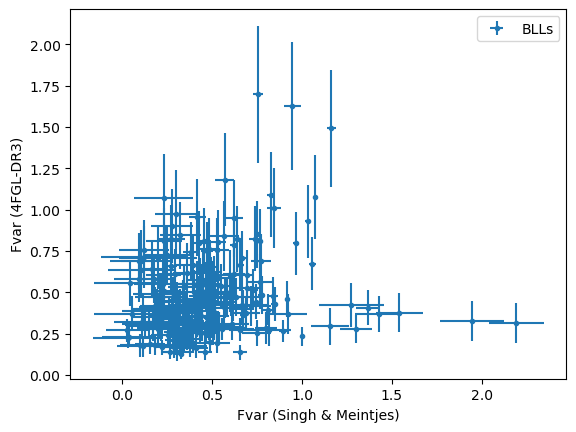

In [113]:
plt.figure()
plt.errorbar(bll_fvar, bll_fvar_4fgldr3, xerr=bll_fvar_err, yerr=bll_fvar_err_4fgldr3, fmt='.', label='BLLs')
plt.xlabel('Fvar (Singh & Meintjes)')
plt.ylabel('Fvar (4FGL-DR3)')
#plt.xscale('log')
#plt.yscale('log')
plt.legend(loc='best')

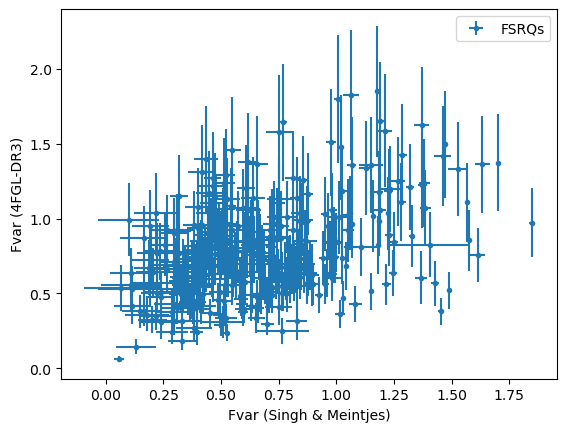

In [114]:
plt.figure()
plt.errorbar(fsrq_fvar, fsrq_fvar_4fgldr3, xerr=fsrq_fvar_err, yerr=fsrq_fvar_err_4fgldr3, fmt='.', label='FSRQs')
plt.xlabel('Fvar (Singh & Meintjes)')
plt.ylabel('Fvar (4FGL-DR3)')
#plt.xscale('log')
#plt.yscale('log')
plt.legend(loc='best')

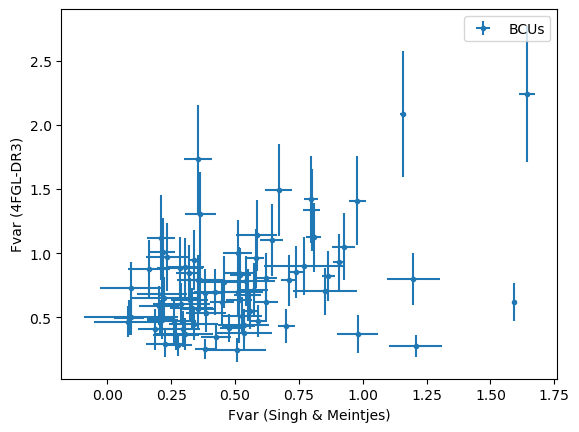

In [115]:
plt.figure()
plt.errorbar(bcu_fvar, bcu_fvar_4fgldr3, xerr=bcu_fvar_err, yerr=bcu_fvar_err_4fgldr3, fmt='.', label='BCUs')
plt.xlabel('Fvar (Singh & Meintjes)')
plt.ylabel('Fvar (4FGL-DR3)')
#plt.xscale('log')
#plt.yscale('log')
plt.legend(loc='best')

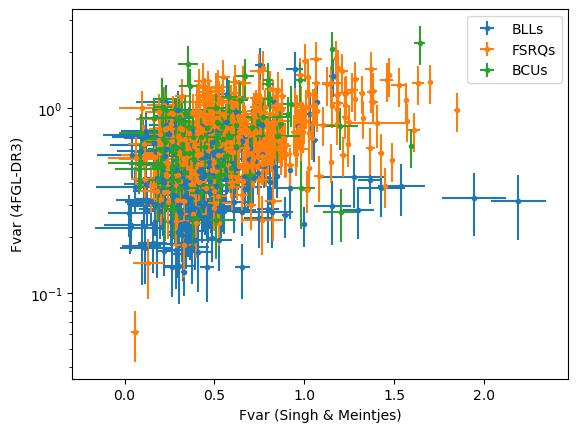

In [116]:
plt.figure()
plt.errorbar(bll_fvar, bll_fvar_4fgldr3, xerr=bll_fvar_err, yerr=bll_fvar_err_4fgldr3, fmt='.', label='BLLs')
plt.errorbar(fsrq_fvar, fsrq_fvar_4fgldr3, xerr=fsrq_fvar_err, yerr=fsrq_fvar_err_4fgldr3, fmt='.', label='FSRQs')
plt.errorbar(bcu_fvar, bcu_fvar_4fgldr3, xerr=bcu_fvar_err, yerr=bcu_fvar_err_4fgldr3, fmt='.', label='BCUs')
plt.xlabel('Fvar (Singh & Meintjes)')
plt.ylabel('Fvar (4FGL-DR3)')
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')

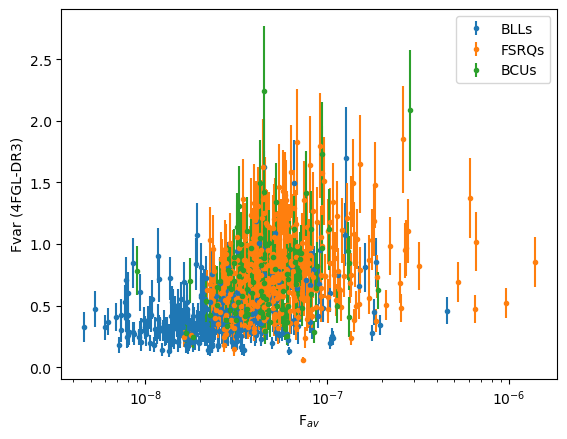

In [117]:
plt.figure()
plt.errorbar(bll_avflux, bll_fvar_4fgldr3, yerr=bll_fvar_err_4fgldr3, fmt='.', label='BLLs')
plt.errorbar(fsrq_avflux, fsrq_fvar_4fgldr3, yerr=fsrq_fvar_err_4fgldr3, fmt='.', label='FSRQs')
plt.errorbar(bcu_avflux, bcu_fvar_4fgldr3, yerr=bcu_fvar_err_4fgldr3, fmt='.', label='BCUs')
plt.xlabel('F$_{av}$')
plt.ylabel('Fvar (4FGL-DR3)')
plt.xscale('log')
#plt.yscale('log')
plt.legend(loc='best')

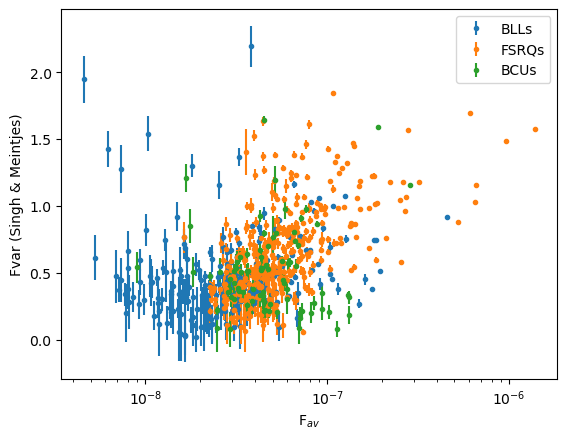

In [118]:
plt.figure()
plt.errorbar(bll_avflux, bll_fvar, yerr=bll_fvar_err, fmt='.', label='BLLs')
plt.errorbar(fsrq_avflux, fsrq_fvar, yerr=fsrq_fvar_err, fmt='.', label='FSRQs')
plt.errorbar(bcu_avflux, bcu_fvar, yerr=bcu_fvar_err, fmt='.', label='BCUs')
plt.xlabel('F$_{av}$')
plt.ylabel('Fvar (Singh & Meintjes)')
plt.xscale('log')
#plt.yscale('log')
plt.legend(loc='best')

93
93


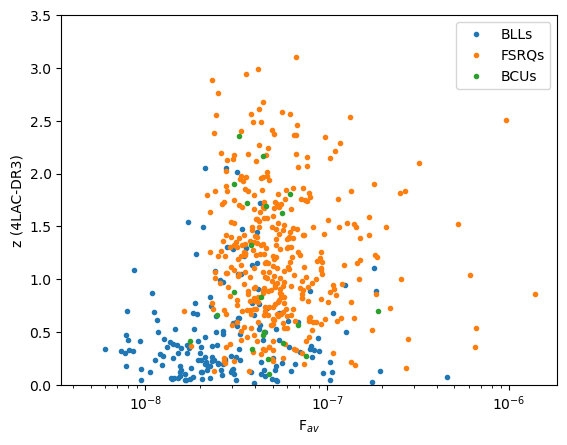

In [119]:
plt.figure()
plt.errorbar(bll_avflux_4lac_dr3, bll_z_4lac_dr3, fmt='.', label='BLLs')
plt.errorbar(fsrq_avflux_4lac_dr3, fsrq_z_4lac_dr3, fmt='.', label='FSRQs')
plt.errorbar(bcu_avflux_4lac_dr3, bcu_z_4lac_dr3, fmt='.', label='BCUs')
plt.xlabel('F$_{av}$')
plt.ylabel('z (4LAC-DR3)')
plt.xscale('log')
plt.ylim(0,3.5)
plt.legend(loc='best')

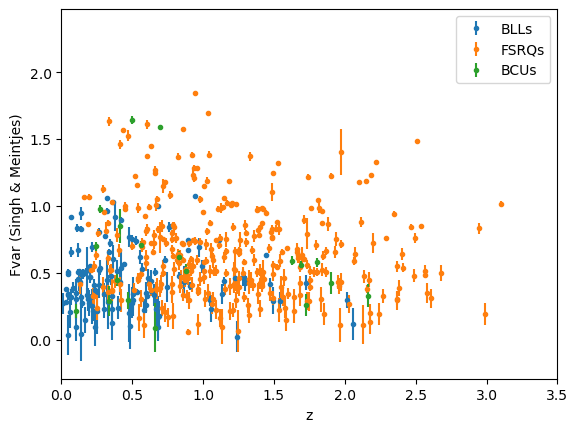

In [120]:
plt.figure()
plt.errorbar(bll_z_4lac_dr3, bll_fvar_4lac_dr3, yerr=bll_fvar_err_4lac_dr3, fmt='.', label='BLLs')
plt.errorbar(fsrq_z_4lac_dr3, fsrq_fvar_4lac_dr3, yerr=fsrq_fvar_err_4lac_dr3, fmt='.', label='FSRQs')
plt.errorbar(bcu_z_4lac_dr3, bcu_fvar_4lac_dr3, yerr=bcu_fvar_err_4lac_dr3, fmt='.', label='BCUs')
plt.xlabel('z')
plt.ylabel('Fvar (Singh & Meintjes)')
plt.xlim(0,3.5)
#plt.yscale('log')
plt.legend(loc='best')